In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn import metrics


Loading the csv file 

In [16]:
df = pd.read_csv("CompleteDataset.csv")

In [17]:
col = ['Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Long shots','Penalties', 'Shot power', 'Volleys', 
       'Short passing', 'Long passing',
       'Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'Ball control','Composure','Jumping', 
       'Sprint speed', 'Positioning','Preferred Positions']
df = df[col]
len(df)

17981

Removing Gk stats 

In [18]:
df.head()
df['Preferred Positions'] = df['Preferred Positions'].str.strip()
df = df[df['Preferred Positions'] != 'GK']

Taking unique values from the preferred postions

In [19]:
positions = df['Preferred Positions'].str.split()
positions = positions.apply(lambda x: x[0]).unique()
positions

array(['ST', 'RW', 'LW', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM', 'RB',
       'CF', 'RWB', 'LWB'], dtype=object)

In [20]:
df_new = df.copy()
df_new.drop(df_new.index, inplace=True)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(22.5, 100, 'Mixed Attributes')

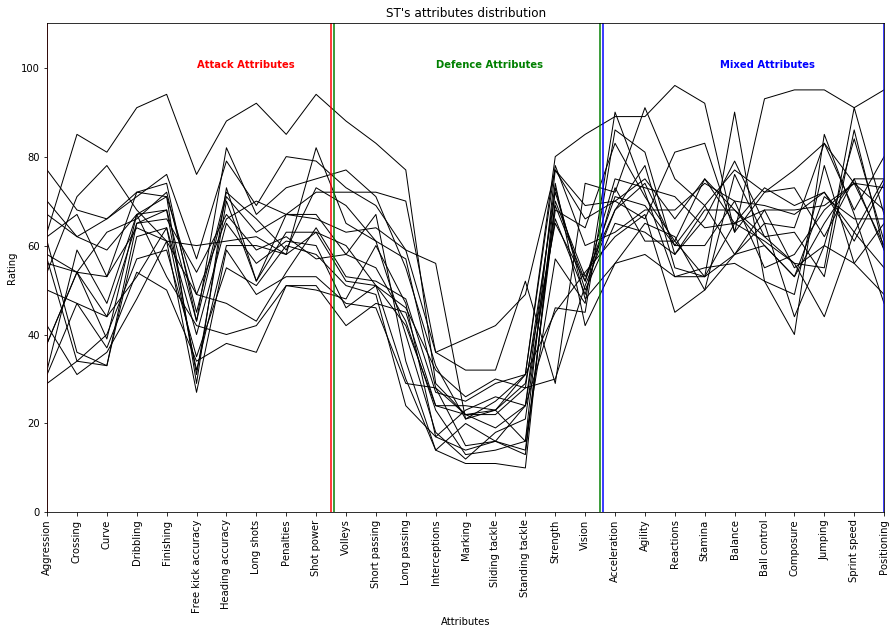

In [21]:
for i in positions:
    df_temp = df[df['Preferred Positions'].str.contains(i)]
    df_temp['Preferred Positions'] = i
    df_new = df_new.append(df_temp, ignore_index=True)
cols = [col for col in df_new.columns if col not in ['Preferred Positions']]

for i in cols:
    df_new[i] = df_new[i].apply(lambda x: eval(x) if isinstance(x,str) else x)
figure, ax = plt.subplots()
data_frame = df_new[df_new['Preferred Positions'] == 'ST'].iloc[::200,:-1]
data_frame.T.plot.line(color = 'black', figsize = (15,9), legend = False, ylim = (0, 110), title = "ST's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)


for l in ax.lines:
    l.set_linewidth(1)

ax.axvline(0, color='red', linestyle='-')   
ax.axvline(9.5, color='red', linestyle='-')

ax.axvline(9.6, color='Green', linestyle='-')
ax.axvline(18.5, color='Green', linestyle='-')

ax.axvline(18.6, color='blue', linestyle='-')
ax.axvline(28, color='blue', linestyle='-')

ax.text(5, 100, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13, 100, 'Defence Attributes', color = 'Green', weight = 'bold')
ax.text(22.5, 100, 'Mixed Attributes', color = 'blue', weight = 'bold')



Perform normailzation on the dataset 

Text(22.5, 0.075, 'Mixed Attributes')

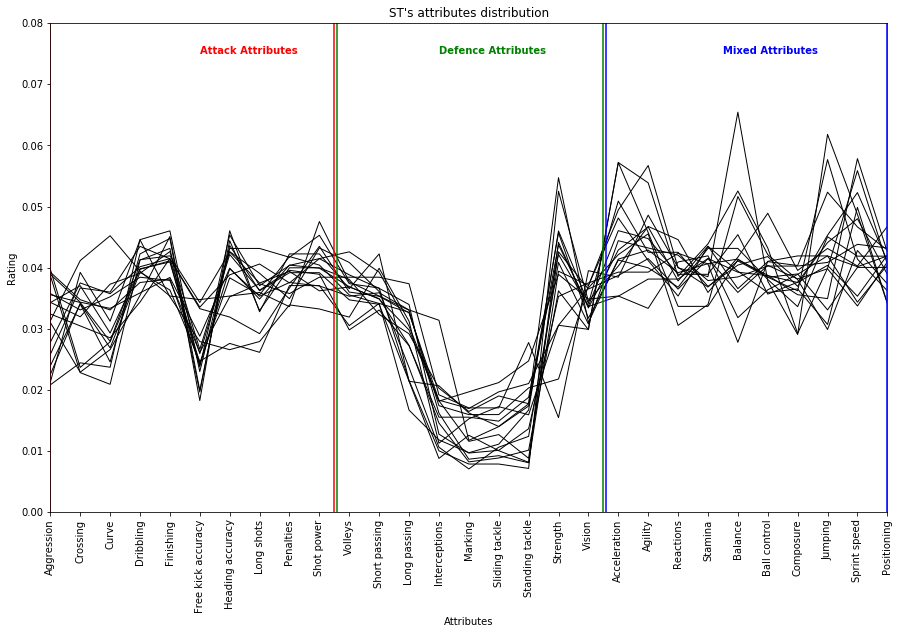

In [22]:
data_frame = df_new[df_new['Preferred Positions'] == 'ST'].iloc[::200,:-1]
Normalized_Dataframe = data_frame.div(data_frame.sum(axis=1),axis=0)

figure, ax = plt.subplots()
Normalized_Dataframe.T.plot.line(color = 'black', figsize = (15,9), legend = False, ylim = (0,0.08), title = "ST's attributes distribution", ax=ax)


ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for l in ax.lines:
    l.set_linewidth(1)

ax.axvline(0, color='red', linestyle='-')   
ax.axvline(9.5, color='red', linestyle='-')

ax.axvline(9.6, color='Green', linestyle='-')
ax.axvline(18.5, color='Green', linestyle='-')

ax.axvline(18.6, color='blue', linestyle='-')
ax.axvline(28, color='blue', linestyle='-')

ax.text(5, 0.075, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13, 0.075, 'Defence Attributes', color = 'Green', weight = 'bold')
ax.text(22.5, 0.075, 'Mixed Attributes', color = 'blue', weight = 'bold')

Taking the normailzed dataset to streamline the data for fetching higher accuracy 

In [23]:
Normalized_dataframe = df_new.iloc[:,:-1].div(df_new.iloc[:,:-1].sum(axis=1), axis=0)
mapping = {'ST': 2, 'RW': 2, 'LW': 2, 'RM': 1, 'CM': 1, 'LM': 1, 'CAM': 1, 'CF': 2, 
           'CDM': 0, 'CB': 0, 'LB': 0, 'RB': 0, 'RWB': 0, 'LWB': 0}
Normalized_dataframe['Preferred Positions'] = df_new['Preferred Positions']
Normalized_dataframe = Normalized_dataframe.replace({'Preferred Positions': mapping})

In [24]:
X_train, X_test, y_train, y_test = train_test_split(Normalized_dataframe.iloc[:,:-1], 
                                                    Normalized_dataframe.iloc[:,-1] ,random_state=143)

After spliting the data perform classification 

In [25]:
model_train = LogisticRegression().fit(X_train, y_train)
y_pred = model_train.predict(X_test) 
accuracy = accuracy_score(y_pred,y_test)
print ('Logistic Regression Accuracy: {}'.format(accuracy))


Logistic Regression Accuracy: 0.7243505063848524


In [26]:
Coef_list = list(sorted(zip(X_train.columns, abs(model_train.coef_[0])),key=lambda x: -x[1]))
Coef_table = pd.DataFrame(np.array(Coef_list).reshape(-1,2), columns = ['Attributes', 'Coef'])

print (Coef_table)

# cosider top 10 feature and train your model to get accuracy
top_attributes = Coef_table[:10]['Attributes'].tolist() 

            Attributes                Coef
0              Marking  21.599927422501008
1       Sliding tackle  20.625011412670233
2      Standing tackle  20.016729004058327
3        Interceptions  18.692296889029784
4            Finishing  15.881434289716216
5          Positioning  11.077589846505356
6              Volleys  10.467791118204005
7           Long shots   9.941547253463234
8           Aggression    9.02538378592326
9               Vision   8.720736881433336
10           Dribbling   7.960700154190061
11           Penalties   7.396061833002702
12            Strength   7.242566361998122
13    Heading accuracy   6.043146606197712
14               Curve   5.886038155446902
15          Shot power   5.618996038904338
16             Agility   5.470308255804029
17  Free kick accuracy   5.438870560489627
18             Jumping   5.204292281016075
19        Ball control   4.525094411505547
20             Balance   4.414533611582708
21        Acceleration   3.468673461957166
22         

In [27]:
print('Confusion  matrix\n',metrics.confusion_matrix(y_pred,y_test))

Confusion  matrix
 [[2407  638  104]
 [ 268 2036  789]
 [   0   79  492]]


In [28]:
model_train = MLPClassifier(random_state=143).fit(X_train, y_train)
Accuracy = model_train.score(X_test, y_test)
print ('Neural Networks Accuracy: {}'.format(Accuracy))

Neural Networks Accuracy: 0.7537061500073389


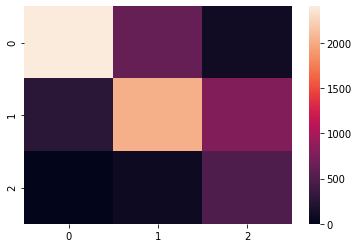

In [29]:
sns.heatmap(metrics.confusion_matrix(y_pred,y_test))

In [30]:
model_train = RandomForestClassifier(random_state=143).fit(X_train, y_train)
Accuracy = model_train.score(X_test, y_test)
print ('Random Forest  Accuracy: {}'.format(Accuracy))


Random Forest  Accuracy: 0.6682812270659034


In [31]:
model_train = GaussianNB().fit(X_train, y_train)
Accuracy = model_train.score(X_test, y_test)
print ('Gaussian Naive bayes Accuracy: {}'.format(Accuracy))

Gaussian Naive bayes Accuracy: 0.7202407162777044


In [32]:
pca = PCA(n_components= 15)
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:,:-1], df_new.iloc[:,-1], random_state=0)

X_train = pca.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

x_test = pca.transform(X_test)
model_train = MLPClassifier(random_state=143).fit(X_train, y_train)
Accuracy = model_train.score(x_test, y_test)
print ('PCA with MLP Classifier Accuracy: {}'.format(Accuracy))

PCA with MLP Classifier Accuracy: 0.4100983414061353
